In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
H0 = 100
c_const = 3*10**(5)
n_s = 10000

data = np.loadtxt("jla_mub_0.txt")
cov_matx=np.loadtxt("jla_mub_covmatrix.txt")
z=data[:,0]
Mu = data[:,1]
cov = cov_matx.reshape(31,31)
In_c = np.linalg.inv(cov)
#print(In_c)


def eta(a,omega):
    s = ((1-omega)/(omega))**(1/3)
    x = (s**(3)+1)**(1/2)
    x1 = s/(a**(3))
    x2 = (s**(2))/(a**(2))
    x3 = (s**(3))/(a)
    x4 = (1/(a**(4)))-(0.1540*x1)+(0.4304*x2)+(0.19097*x3)+(0.066941*s**(4))
    n = 2*x*(x4**(-1/8))
    return n
    
def lum_dis(z,omega):
    g1 = 1+z
    g2 = 1/g1
    d = (c_const/H0)*g1*(eta(1,omega)-eta(g2,omega))
    return d
def mu(z,omega,h):
    mu1 = 25-(5*np.log10(h))+(5*np.log10(lum_dis(z,omega)))
    return mu1
    

def lik(omega,h):
    if (h<=0 or omega<=0):
        
        return -np.inf  
    elif (h>=1 or omega>=1):
        return -np.inf
    else:
        l = 0
        mu_theory = mu(z,omega,h)
        for i in range(31):
            for j in range(31):
                diff1=(Mu[i]-mu_theory[i])
                diff2=(Mu[j]-mu_theory[j])
                u1 = np.dot(In_c[i,j],diff1)
                l += u1*diff2
        return (-0.5)*l

In [3]:
#MCMC sampling(Standard deviation=0.05)
h = np.zeros(n_s)
#print(h)
omega = np.zeros(n_s)
# print(ohm)
h[0]=0.6
omega[0]=0.5
for i in range(1,n_s):
    cur_h = h[i-1]
    cur_omega = omega[i-1]
    propsd_h = np.random.normal(cur_h,0.05)
    propsd_omega = np.random.normal(cur_omega,0.05)
    lik_n1 = lik(cur_omega,cur_h)
    lik_n2 = lik(propsd_omega,propsd_h)
    y1 = np.exp((lik_n2)-(lik_n1))
    y = min(1,y1)
    u = np.random.uniform(0,1)
    if u<y:
        h[i] = propsd_h
        omega[i] = propsd_omega
    else:
        h[i] = cur_h
        omega[i]=cur_omega
        

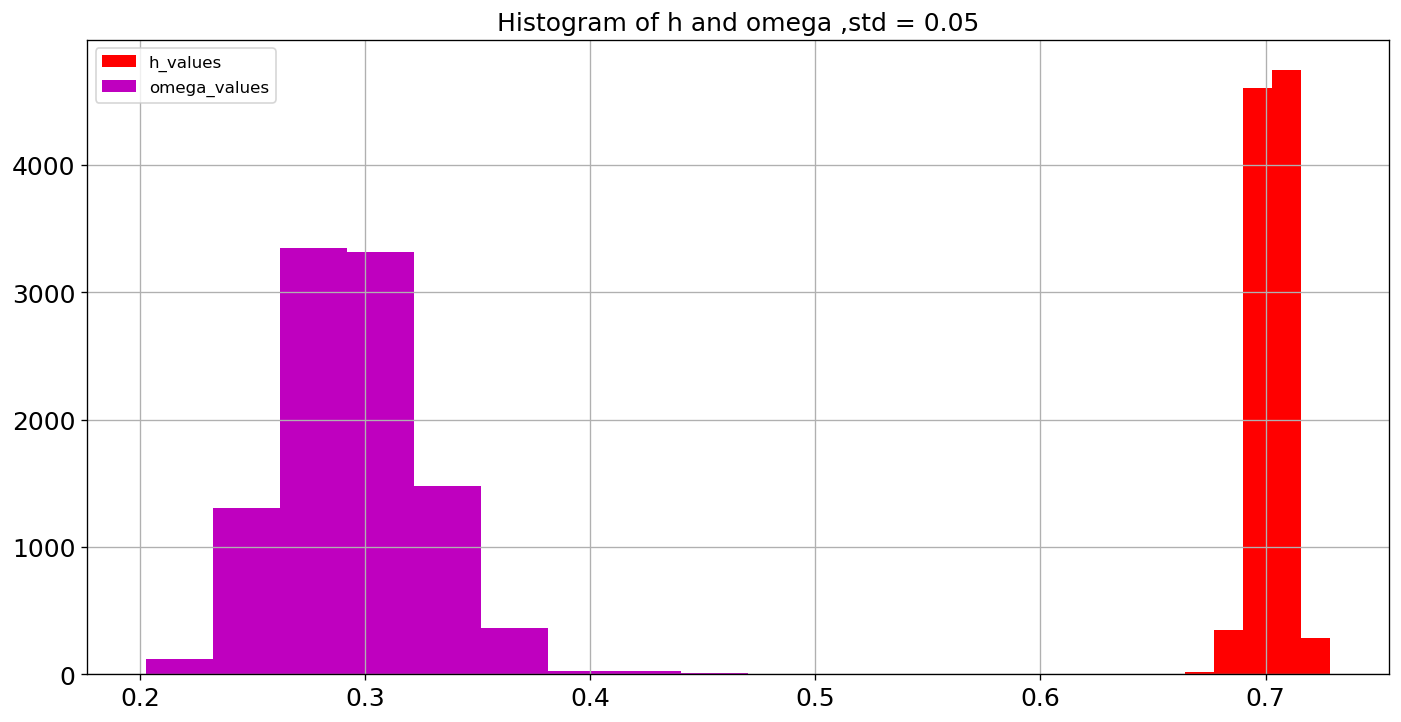

In [4]:
plt.figure(figsize=(14,7),dpi=120)
plt.hist(h,color='r',label='h_values')
plt.hist(omega,color='m',label='omega_values')
plt.xticks(fontsize=15)
#plt.xlim(0.1,0.9)
plt.yticks(fontsize=15)
plt.title('Histogram of h and omega ,std = 0.05',fontsize='15')
plt.grid()
plt.legend()
#plt.savefig("hist(1).pdf")

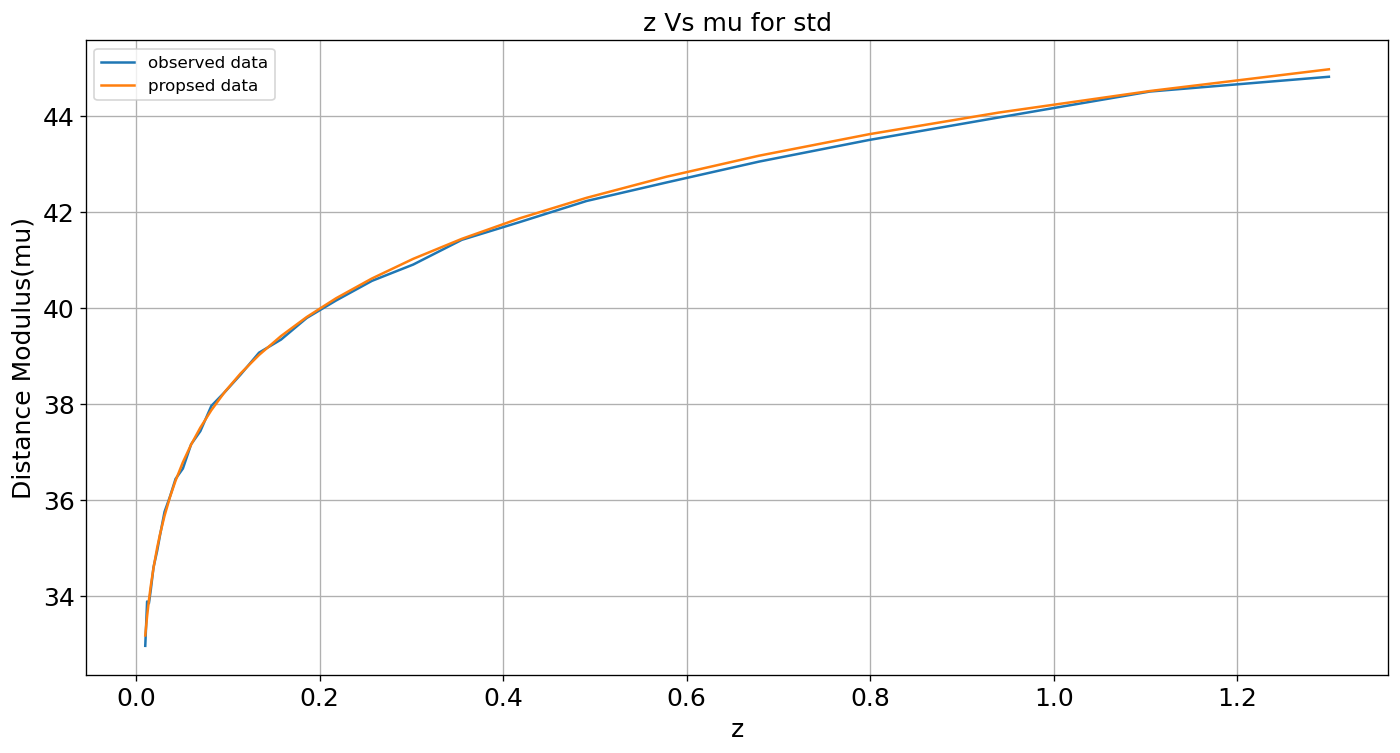

In [5]:
plt.figure(figsize=(14,7),dpi=120)
plt.plot(z,Mu,label='observed data')
plt.plot(z,mu(z,0.2,0.7),label='propsed data')
plt.xlabel('z',fontsize='15')
plt.ylabel('Distance Modulus(mu)',fontsize='15')
plt.title("z Vs mu for std",fontsize='15')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend()
plt.grid()
#plt.savefig("z vs mu.pdf")

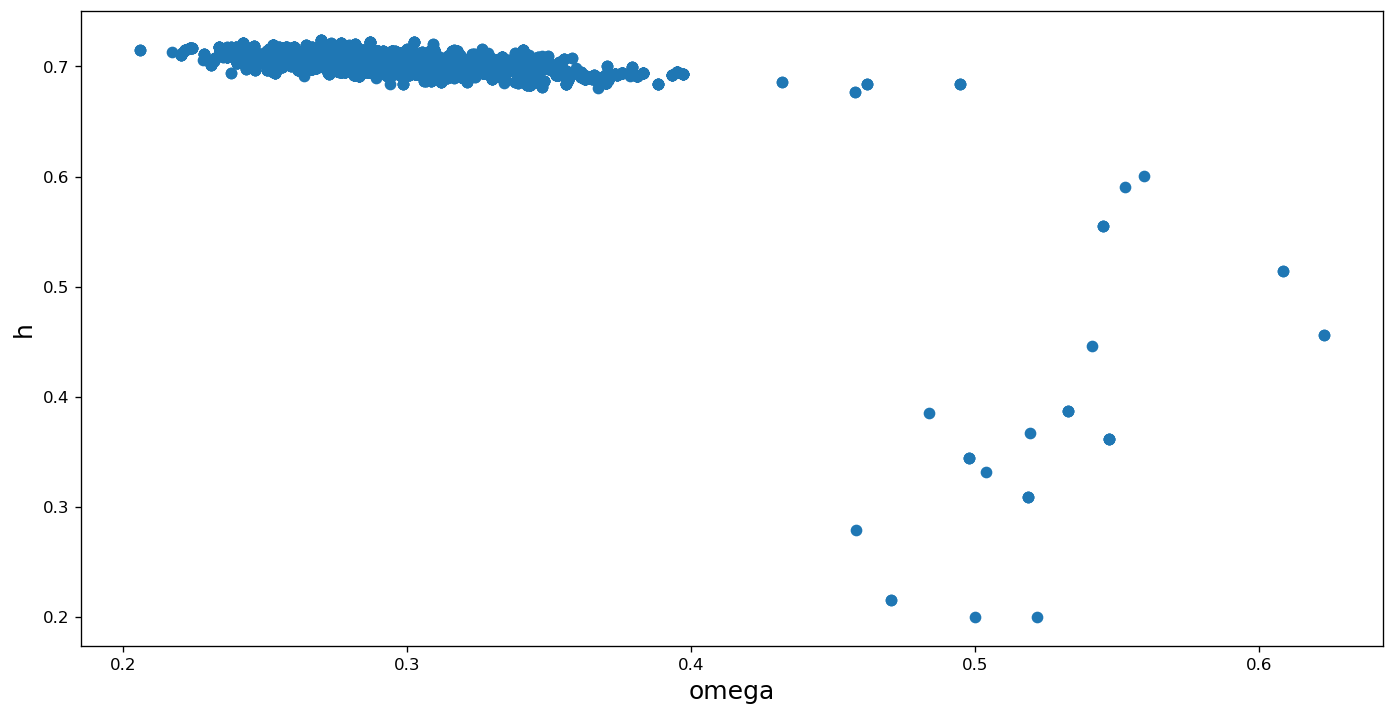

In [6]:
plt.figure(figsize=(14,7),dpi=120)
plt.scatter(omega,h)
plt.xlabel('omega',fontsize='15')
plt.ylabel('h',fontsize='15')
plt.savefig("scatter.pdf")

In [7]:
#Covariance of h and omega 
b = np.sum((h-(np.mean(h)))*(omega-(np.mean(omega))))/(n_s-1)    
print(b)

-0.0003509794852350854


In [8]:
#Mean and variance of h 
k1 = np.mean(h)
k2 = np.square(h)
k3 = k1**(2)
k4 = k2-k3
k = np.mean(k4)
print("Variance of h is ",k)

Variance of h is  0.0003937213292159737


In [9]:
#Variance of Omega
M1 = np.mean(omega)
M2 = np.square(omega)
M3 = M1**(2)
M4 = M2-M3
M = np.mean(M4)
print("Variance of Omega is",M)

Variance of Omega is 0.0011553740404663215


In [10]:
#MCMC sampling (standard deviation=100)
h1 = np.zeros(n_s)
#print(h)
omega1 = np.zeros(n_s)
# print(ohm)
h1[0]=0.2
omega1[0]=0.5
for i in range(1,n_s):
    cur_h1 = h1[i-1]
    cur_omega1 = omega1[i-1]
    propsd_h1 = np.random.normal(cur_h1,100)
    propsd_omega1 = np.random.normal(cur_omega1,100)
    lik_n11 = lik(cur_omega1,cur_h1)
    lik_n22 = lik(propsd_omega1,propsd_h1)
    y11 = np.exp((lik_n22)-(lik_n11))
    y1_1 = min(1,y11)
    u1 = np.random.uniform(0,1)
    if u1<y1_1:
        h1[i] = propsd_h1
        omega1[i] = propsd_omega1
    else:
        h1[i] = cur_h1
        omega1[i]=cur_omega1
        

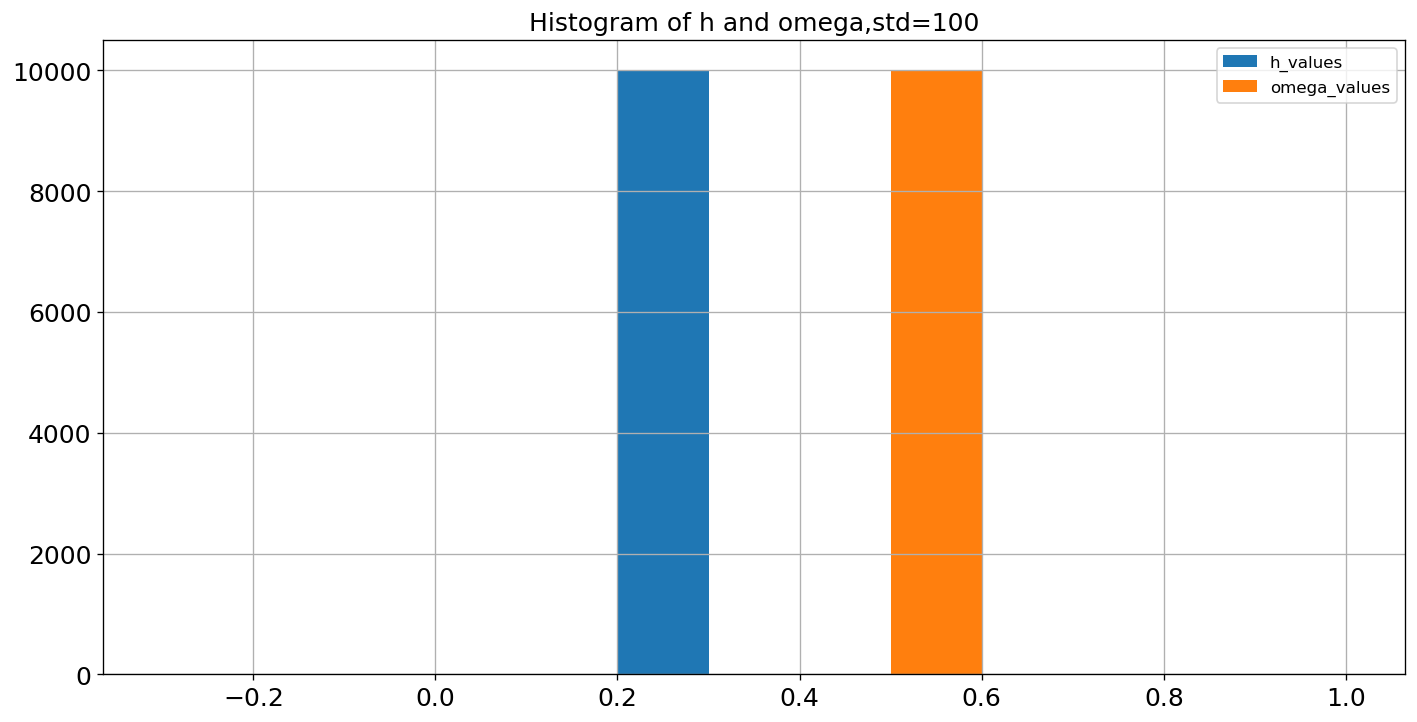

In [11]:
#Standard deviation=100
plt.figure(figsize=(14,7),dpi=120)
plt.hist(h1,label='h_values')
plt.hist(omega1,label='omega_values')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Histogram of h and omega,std=100",fontsize='15')
plt.grid()
plt.legend()

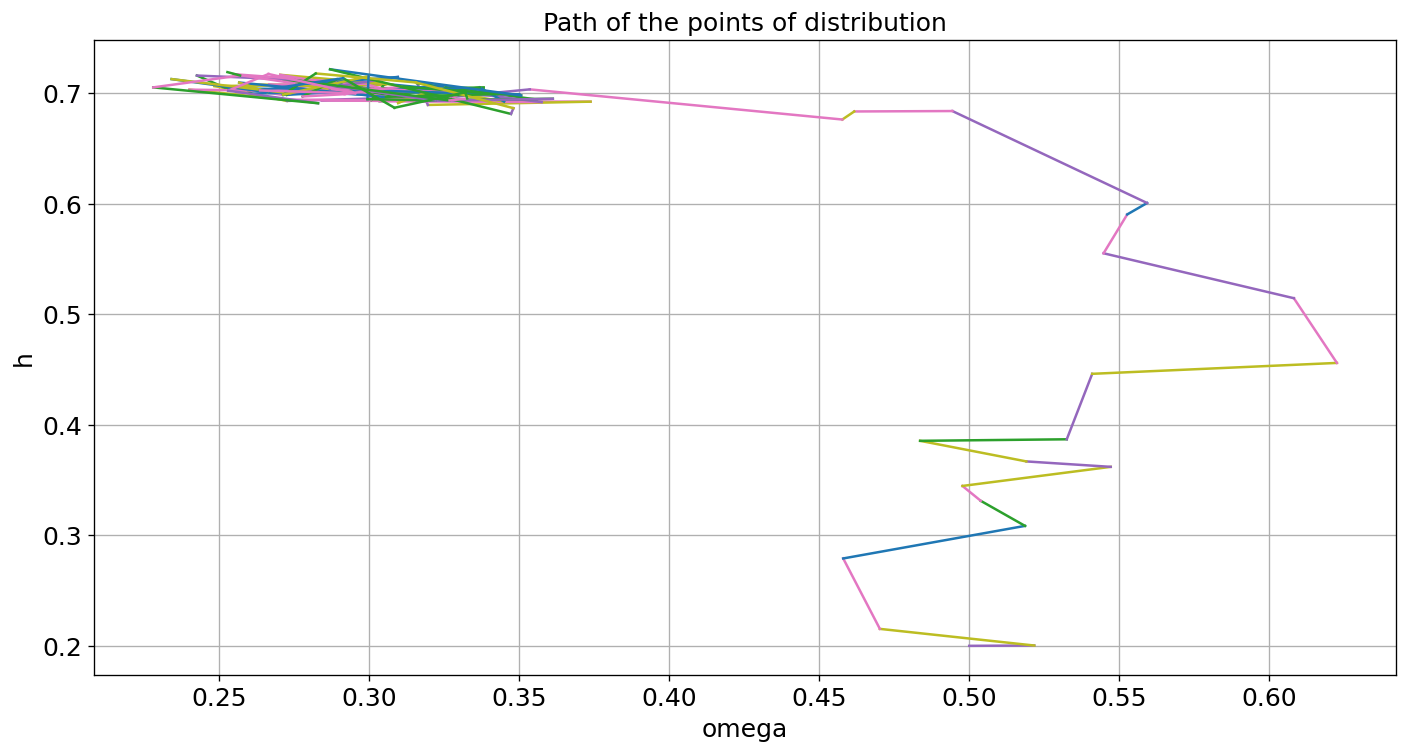

In [20]:
figure,ax = plt.subplots(figsize=(14,7),dpi=120)
ax.plot(omega[0],h[0])
ax.plot(omega1[0],h1[0])

for i in range(1,1000):
    ax.plot(omega[i],h[i])
    ax.plot(omega1[i],h1[i])
    
    ax.plot([omega[i-1],omega[i]],[h[i-1],h[i]])
    ax.plot([omega1[i-1],omega1[i]],[h1[i-1],h1[i]])
    
plt.title("Path of the points of distribution",fontsize=15)
plt.xlabel("omega",fontsize='15')
plt.ylabel("h",fontsize='15')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
#plt.savefig("distribution.pdf")
#lt.legend()